In [257]:
# load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# train.csv file provided by Kaggle
fdata = pd.read_csv('train.csv')

In [258]:
# view the data
display(fdata.head())
fdata.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**NOTE: The Alley, MiscFeature, PoolQC, and Fence columns only have 91, 54,7, and 281 valid entries and as a majority of the columnns are NaN, they will be removed.**However, before removal they will be inspected to see if some should be recoded if the information is valuable (ex. pool vs. no pool).

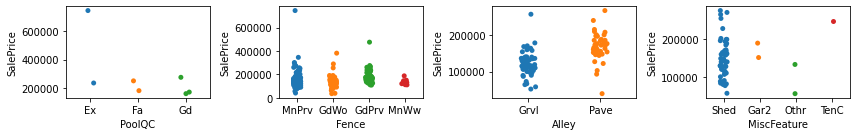

In [259]:
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'PoolQC',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'Fence', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'Alley', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'MiscFeature', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**The PoolArea variable can speak to the impact having a pool has on the overall sale price opposed to recoding PoolQC, so PoolQC will be dropped. There doesn't appear to be a difference in the price by grouping of categories within the other 3 variables either so they will be dropped as well. If Alley had more value then it might be a good variable to include as for the 91 values present it appears the sale price does tend higher for Paved vs. Gravel.**

In [260]:
# drop the 4 features with large amounts of missing values and Id and FirePlaceQu
fdata.drop(['Id', 'Alley', 'MiscFeature', 'PoolQC', 'Fence','FireplaceQu'], axis = 'columns', inplace = True)

**Check whether the exterior columns are mostly similar.** If these columns are mainly identical then Exterior2nd will be dropped.

In [261]:
assert np.sum(fdata['Exterior1st'] == fdata['Exterior2nd']) > .80 * len(fdata['Exterior1st'])

# drop exterior2nd
fdata.drop(['Exterior2nd'], axis = 'columns', inplace = True)

**Check all object variables and keep variables that show change in price given categorical breakdown and convert to categorical.**

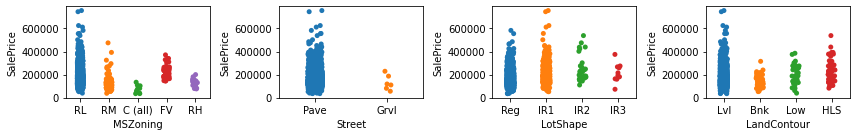

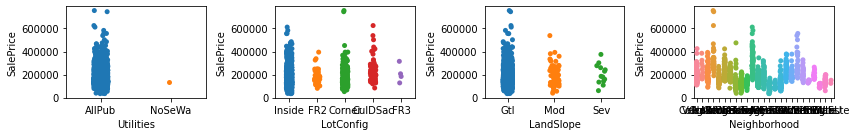

In [262]:
# check variables: MSZoning, Street, LotShape, LandContour
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'MSZoning',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'Street', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LotShape', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'LandContour', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: Utilities, LotConfig, LandSlope, Neighborhood
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'Utilities',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'LotConfig', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LandSlope', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'Neighborhood', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove Street and Utilities as these variables show no distinction between groups as far as sale price.**

In [263]:
# drop Street and Utilities
fdata.drop(['Street','Utilities'], axis = 'columns', inplace = True)

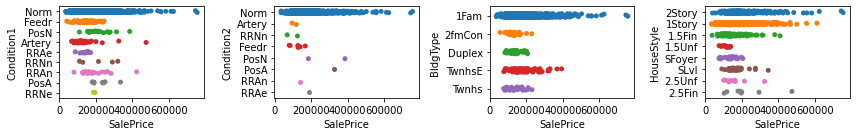

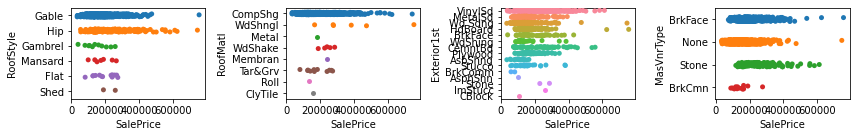

In [264]:
# check variables: Condition1, Condition2, BldgType, HouseStyle
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Condition1',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'Condition2', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'BldgType', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'HouseStyle', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: RoofStyle, RoofMatl, Exterior1st, MasVnrType 
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'RoofStyle',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'RoofMatl', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'Exterior1st', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'MasVnrType', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove RoofMatl and Condition2 as these variables show no distinction between groups as far as sale price or have minimal points present across a few categories.**

In [265]:
# drop RoofMatl and Condition2
fdata.drop(['RoofMatl','Condition2'], axis = 'columns', inplace = True)


MSSubClass should be categorical as the values define categories.

In [266]:
fdata['MSSubClass'] = fdata['MSSubClass'].astype('category') # convert MSSubClass


### Feature Engineering

### Model - Test and Evaluate


In [267]:
# Drop all columns that have NA values
fdata.dropna(axis = 'columns', inplace = True)
fdata.drop(['MSZoning', 'Exterior1st', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageCars', 'GarageArea', 'SaleType', 'Heating', 'HouseStyle'], axis = 'columns', inplace = True)

In [268]:
# convert columns to categories
#for i in range(0,len(fdata.columns)):
    #if fdata.iloc[:,i].dtype == 'O':
        #fdata.iloc[:,i] = fdata.iloc[:,i].astype('category')

In [269]:
# create dummy variables prior to loading into the model
fdata = pd.get_dummies(fdata)

In [270]:
# get key imports for modeling with RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

In [271]:
X = fdata.drop(['SalePrice'], axis = 'columns')
y = fdata['SalePrice']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

In [273]:
rf = RandomForestClassifier()

In [274]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [275]:
y_pred = rf.predict(X_test)

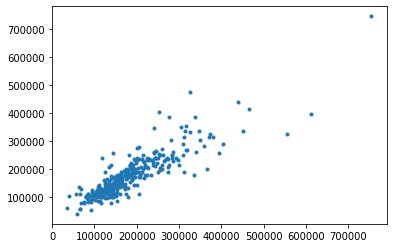

In [276]:
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none')
plt.show()

In [277]:
# define RMSLE as a function
def rmsle(y_test, y_pred):
    vector_to_square = np.log(y_test + 1) - np.log(y_pred + 1)
    inside_avg = np.mean(vector_to_square**2)
    rmsle_value = np.sqrt(inside_avg)
    return rmsle_value

rmsle(y_test, y_pred)

0.2071073257221829

Quick submission for score off of untuned parameters

In [278]:
# load the data
test_data = pd.read_csv('test.csv')

In [279]:
test_data.dropna(axis = 'columns', inplace = True)
test_data['MSSubClass'] = test_data['MSSubClass'].astype('category')
test_data.drop(['Id', 'Street', 'Condition2', 'RoofMatl', 'Electrical', 'Heating', 'HouseStyle'], axis = 'columns', inplace = True)
test_data.iloc[1358,0] = 120

In [280]:
test_data = pd.get_dummies(test_data)
test_data.drop(['MSSubClass_150'],axis = 'columns', inplace = True)

In [281]:
test_pred = rf.predict(test_data)

In [282]:
# load structure for submission
submission = pd.read_csv('sample_submission.csv')

In [283]:
display(submission.head())

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [285]:
submission.SalePrice = test_pred

In [286]:
submission.to_csv('baseline_submission_rf_no_tuned_params.csv')